In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
from glob import glob
#from keras.applications import ResNet50
from keras.models import Model
#from keras.applications import Xception

In [ ]:
images_path = '../input/flickr8k-sau/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

## By using VGG16

In [ ]:
incept_model = tf.keras.applications.VGG16(include_top=True)
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

553467904/553467096 [==============================] - 8s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________________

In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    # changing the order of image pixels to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    # converting into 4D tensor (batch,h,w,channels)
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(4096,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)
    
        
len(images_features)    

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


1500

In [ ]:
caption_path = '../input/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')
len(captions)

40461

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass
    
len(captions_dict)    

1500

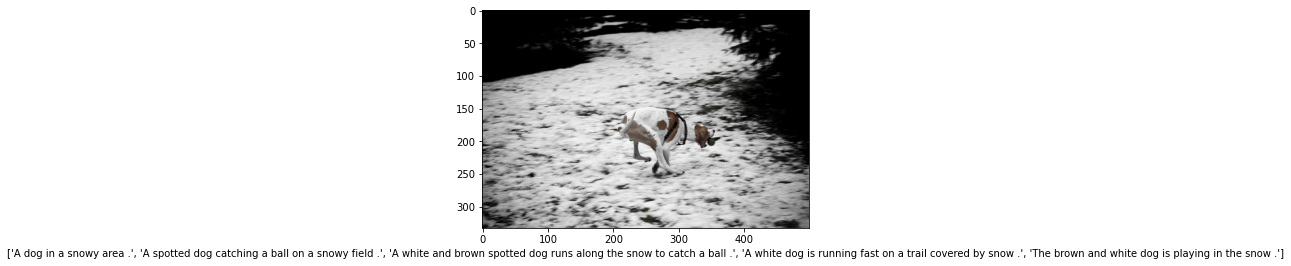

In [ ]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = '../input/flickr8k-sau/Flickr_Data/Images/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [ ]:

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
captions_dict

{'1002674143_1b742ab4b8.jpg': ['startofseq a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl . endofseq',
  'startofseq a little girl is sitting in front of a large painted rainbow . endofseq',
  'startofseq a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it . endofseq',
  'startofseq there is a girl with pigtails sitting in front of a rainbow painting . endofseq',
  'startofseq young girl with pigtails painting outside in the grass . endofseq'],
 '102351840_323e3de834.jpg': ['startofseq a man drilling a hole in the ice . endofseq',
  'startofseq a man is drilling through the frozen ice of a pond . endofseq',
  'startofseq a person in the snow drilling a hole in the ice . endofseq',
  'startofseq a person standing on a frozen lake . endofseq',
  'startofseq two men are ice fishing . endofseq'],
 '1024138940_f1fefbdce1.jpg': ['startofseq two different breeds of brown and white dogs play on the beach 

# **Create Vocabulary**

In [ ]:
# count the frequency of words in Caption_dict
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1
len(count_words)                

4073

In [ ]:
# assign the index to each word
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

len(new_dict)

4073

In [ ]:
new_dict['<OUT>'] = len(new_dict) 

In [ ]:
new_dict

{'startofseq': 1,
 'a': 2,
 'little': 3,
 'girl': 4,
 'covered': 5,
 'in': 6,
 'paint': 7,
 'sits': 8,
 'front': 9,
 'of': 10,
 'painted': 11,
 'rainbow': 12,
 'with': 13,
 'her': 14,
 'hands': 15,
 'bowl': 16,
 '.': 17,
 'endofseq': 18,
 'is': 19,
 'sitting': 20,
 'large': 21,
 'small': 22,
 'the': 23,
 'grass': 24,
 'plays': 25,
 'fingerpaints': 26,
 'white': 27,
 'canvas': 28,
 'on': 29,
 'it': 30,
 'there': 31,
 'pigtails': 32,
 'painting': 33,
 'young': 34,
 'outside': 35,
 'man': 36,
 'drilling': 37,
 'hole': 38,
 'ice': 39,
 'through': 40,
 'frozen': 41,
 'pond': 42,
 'person': 43,
 'snow': 44,
 'standing': 45,
 'lake': 46,
 'two': 47,
 'men': 48,
 'are': 49,
 'fishing': 50,
 'different': 51,
 'breeds': 52,
 'brown': 53,
 'and': 54,
 'dogs': 55,
 'play': 56,
 'beach': 57,
 'making': 58,
 'turn': 59,
 'soft': 60,
 'sand': 61,
 'playing': 62,
 'at': 63,
 'together': 64,
 'tan': 65,
 'along': 66,
 'sandy': 67,
 'tent': 68,
 'being': 69,
 'set': 70,
 'up': 71,
 'about': 72,
 'to': 7

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
captions_dict = captions_backup.copy()

In [ ]:
# convert each word into integer
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict

{'1002674143_1b742ab4b8.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   6,
   9,
   10,
   2,
   11,
   12,
   13,
   14,
   15,
   6,
   2,
   16,
   17,
   18],
  [1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18],
  [1,
   2,
   22,
   4,
   6,
   23,
   24,
   25,
   13,
   26,
   6,
   9,
   10,
   2,
   27,
   28,
   13,
   2,
   12,
   29,
   30,
   17,
   18],
  [1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18],
  [1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18]],
 '102351840_323e3de834.jpg': [[1, 2, 36, 37, 2, 38, 6, 23, 39, 17, 18],
  [1, 2, 36, 19, 37, 40, 23, 41, 39, 10, 2, 42, 17, 18],
  [1, 2, 43, 6, 23, 44, 37, 2, 38, 6, 23, 39, 17, 18],
  [1, 2, 43, 45, 29, 2, 41, 46, 17, 18],
  [1, 47, 48, 49, 39, 50, 17, 18]],
 '1024138940_f1fefbdce1.jpg': [[1,
   47,
   51,
   52,
   10,
   53,
   54,
   27,
   55,
   56,
   29,
   23,
   57,
   17,
   18],
  [1, 47, 55, 49, 58, 2, 59, 29, 2, 60, 61, 57, 17, 18],
  [1, 47, 55, 62, 6, 23, 61, 63, 23, 57, 17, 18],
  [1

------------------------------------------------------------------------------------------------------

# **Build Generator Function**

In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)
MAX_LEN

[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18]
[1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18]
[1, 2, 180, 190, 6, 2, 77, 191, 54, 77, 192, 193, 2, 53, 194, 121, 2, 41, 46, 54, 195, 196, 17, 18]
[1, 23, 131, 6, 23, 77, 122, 19, 706, 2, 700, 701, 467, 2, 128, 265, 23, 131, 6, 23, 245, 385, 707, 73, 621, 151, 93, 17, 18]
[1, 23, 47, 34, 178, 49, 6, 126, 54, 27, 1049, 54, 1050, 318, 281, 6, 2, 1051, 81, 322, 49, 69, 1052, 279, 2, 36, 1053, 6, 1049, 54, 2, 364, 18]
[1, 318, 188, 27, 205, 19, 35, 23, 156, 81, 472, 27, 205, 13, 2, 126, 2264, 29, 442, 298, 19, 149, 83, 2, 626, 465, 156, 318, 147, 567, 279, 2, 523, 1103, 17, 18]


36

In [ ]:
#captions_dict

In [ ]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])
                #previous words till i-1
                in_seq= [v[:i]]
                # next ith word
                out_seq = v[i]
                # pad_sequences ensures that all the sequences have the same length
                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                # to_categorical is used to convert these integer sequences into binary class, it will replace all out_seq by 1 and rest by 0 in length of VOCAB_SIZE
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out #X stores input feature, y_in input word, and y_out output predicted word
    
    

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

NameError: ignored

In [ ]:
len(X), len(y_in), len(y_out)

(96528, 96528, 96528)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')



In [ ]:
X.shape, y_in.shape, y_out.shape

((96528, 4096), (96528, 36), (96528, 4074))

In [ ]:
X[1510]

array([1.9248737 , 0.        , 0.35845417, ..., 0.2519804 , 0.        ,
       0.47340223], dtype=float32)

In [ ]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

# **MODEL**

In [ ]:

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(4096,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               524416    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 36, 128)           0         
Total params: 524,416
Trainable params: 524,416
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 36, 128)           521472    
_________________________________________________________________
lstm (LSTM)                  (None, 36, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 36, 128)           32896     
Total params: 948,608
Traina

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
189/189 [==============================] - 13s 69ms/step - loss: 5.2870 - accuracy: 0.1189
Epoch 2/50
189/189 [==============================] - 13s 70ms/step - loss: 4.9601 - accuracy: 0.1549
Epoch 3/50
189/189 [==============================] - 13s 70ms/step - loss: 4.5369 - accuracy: 0.2138
Epoch 4/50
189/189 [==============================] - 13s 70ms/step - loss: 4.2841 - accuracy: 0.2438
Epoch 5/50
189/189 [==============================] - 13s 70ms/step - loss: 4.1283 - accuracy: 0.2617
Epoch 6/50
189/189 [==============================] - 13s 70ms/step - loss: 3.9853 - accuracy: 0.2778
Epoch 7/50
189/189 [==============================] - 13s 70ms/step - loss: 3.8360 - accuracy: 0.2938
Epoch 8/50
189/189 [==============================] - 13s 69ms/step - loss: 3.6895 - accuracy: 0.3100
Epoch 9/50
189/189 [==============================] - 13s 69ms/step - loss: 3.5302 - accuracy: 0.3275
Epoch 10/50
189/189 [==============================] - 13s 71ms/step - loss: 3.348

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

# **Predictions**

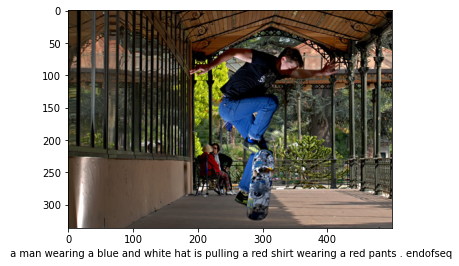

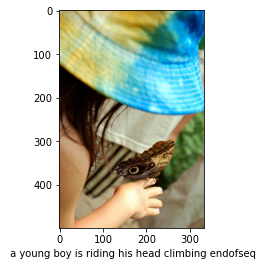

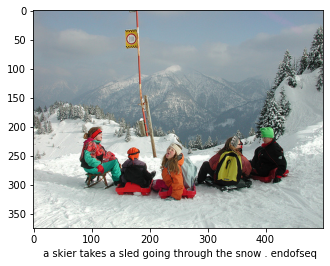

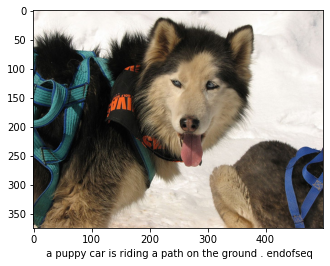

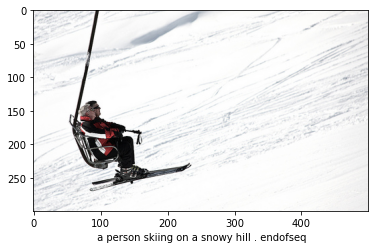

In [ ]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,4096)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))
        
        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)